In [43]:
import pandas as pd
import os
import sys
import math
import numpy as np

In [2]:
AAPL=pd.read_csv("C:\\Users\\lisiy\\Quant Method in Investment\\sp1500data\\sp1500data\\sp1500adjustedPrice\\daily_adjusted_AAPL.csv")

In [146]:
dates=list(AAPL.timestamp)

In [147]:
dates=dates[::-1]

In [166]:
combinedData={}
usefulDate=[]
posWithMomentumRank={}
highestSentiPortfolio={}
secondHighestSentiPortfolio={}
thirdHighestSentiPortfolio={}
fourthHighestSentiPortfolio={}
lowestSentiPortfolio={}
highestSentiDailyReturnEqual=[]
secondHighestSentiDailyReturnEqual=[]
thirdHighestSentiDailyReturnEqual=[]
fourthHighestSentiDailyReturnEqual=[]
lowestSentiDailyReturnEqual=[]
highestSentiDailyReturnMomentumValue=[]
secondHighestSentiDailyReturnMomentumValue=[]
thirdHighestSentiDailyReturnMomentumValue=[]
fourthHighestSentiDailyReturnMomentumValue=[]
lowestSentiDailyReturnMomentumValue=[]
dailyReturn=[]
nclass=5
i=0
for date in dates:
    fileName=("C:\\Users\\lisiy\\Quant Method in Investment\\sp1500data\\combinedMAData\\combined_"+date+".csv")
    if os.path.isfile(fileName):
        usefulDate.append(date)
        combinedData[date]=pd.read_csv(fileName)
        combinedData[date]["sentimentRank"]=combinedData[date]["SentimentScore"].rank(method="min",ascending=False)
        step=math.ceil(len(combinedData[date])/nclass)
        highestSentiPortfolio[date]=combinedData[date][combinedData[date]["sentimentRank"]<step]
        highestSentiPortfolio[date]["momentumRank"]=highestSentiPortfolio[date]["maRatio"].rank(method="min",ascending=False)
        if len(highestSentiPortfolio[date])!=0:
            highestSentiPortfolio[date]["weightByMARatioValue"]=highestSentiPortfolio[date]["maRatio"]/(highestSentiPortfolio[date]["maRatio"].sum())
            highestSentiPortfolio[date]["equalWeight"]=1/len(highestSentiPortfolio[date])
            highestSentiDailyReturnEqual.append(np.mean(highestSentiPortfolio[date]["nextDayReturn"]*highestSentiPortfolio[date]["equalWeight"]))
            highestSentiDailyReturnMomentumValue.append(np.mean(highestSentiPortfolio[date]["nextDayReturn"]*highestSentiPortfolio[date]["weightByMARatioValue"]))
        else:
            highestSentiDailyReturnEqual.append(0)
            highestSentiDailyReturnMomentumValue.append(0)
        
        secondHighestSentiPortfolio[date] = combinedData[date][(combinedData[date]['sentimentRank'] >= step) & (combinedData[date]['sentimentRank'] < 2*step)]
        secondHighestSentiPortfolio[date]["momentumRank"]=secondHighestSentiPortfolio[date]["maRatio"].rank(method="min",ascending=False)
        if len(secondHighestSentiPortfolio[date])!=0:
            secondHighestSentiPortfolio[date]["equalWeight"]=1/len(secondHighestSentiPortfolio[date])
            secondHighestSentiPortfolio[date]["weightByMARatioValue"]=secondHighestSentiPortfolio[date]["maRatio"]/(secondHighestSentiPortfolio[date]["maRatio"].sum())
            secondHighestSentiDailyReturnEqual.append(np.mean(secondHighestSentiPortfolio[date]["nextDayReturn"]*secondHighestSentiPortfolio[date]["equalWeight"]))
            secondHighestSentiDailyReturnMomentumValue.append(np.mean(secondHighestSentiPortfolio[date]["nextDayReturn"]*secondHighestSentiPortfolio[date]["weightByMARatioValue"]))
        else:
            secondHighestSentiDailyReturnEqual.append(0)
            secondHighestSentiDailyReturnMomentumValue.append(0)
        
        thirdHighestSentiPortfolio[date] = combinedData[date][(combinedData[date]['sentimentRank'] >=2* step) & (combinedData[date]['sentimentRank'] < 3*step)]
        thirdHighestSentiPortfolio[date]["momentumRank"]=thirdHighestSentiPortfolio[date]["maRatio"].rank(method="min",ascending=False)
        if len(thirdHighestSentiPortfolio[date])!=0:
            thirdHighestSentiPortfolio[date]["weightByMARatioValue"]=thirdHighestSentiPortfolio[date]["maRatio"]/(thirdHighestSentiPortfolio[date]["maRatio"].sum())
            thirdHighestSentiPortfolio[date]["equalWeight"]=1/len(thirdHighestSentiPortfolio[date])
            thirdHighestSentiDailyReturnEqual.append(np.mean(thirdHighestSentiPortfolio[date]["nextDayReturn"]*thirdHighestSentiPortfolio[date]["equalWeight"]))
            thirdHighestSentiDailyReturnMomentumValue.append(np.mean(thirdHighestSentiPortfolio[date]["nextDayReturn"]*thirdHighestSentiPortfolio[date]["weightByMARatioValue"]))
        else:
            thirdHighestSentiDailyReturnEqual.append(0)
            thirdHighestSentiDailyReturnMomentumValue.append(0)
        
        fourthHighestSentiPortfolio[date] = combinedData[date][(combinedData[date]['sentimentRank'] >=3* step) & (combinedData[date]['sentimentRank'] < 4*step)]
        fourthHighestSentiPortfolio[date]["momentumRank"]=fourthHighestSentiPortfolio[date]["maRatio"].rank(method="min",ascending=False)
        if len(fourthHighestSentiPortfolio[date])!=0:
            fourthHighestSentiPortfolio[date]["weightByMARatioValue"]=fourthHighestSentiPortfolio[date]["maRatio"]/(fourthHighestSentiPortfolio[date]["maRatio"].sum())
            fourthHighestSentiPortfolio[date]["equalWeight"]=1/len(fourthHighestSentiPortfolio[date])
            fourthHighestSentiDailyReturnEqual.append(np.mean(fourthHighestSentiPortfolio[date]["nextDayReturn"]*fourthHighestSentiPortfolio[date]["equalWeight"]))
            fourthHighestSentiDailyReturnMomentumValue.append(np.mean(fourthHighestSentiPortfolio[date]["nextDayReturn"]*fourthHighestSentiPortfolio[date]["weightByMARatioValue"]))
        else:
            fourthHighestSentiDailyReturnEqual.append(0)
            fourthHighestSentiDailyReturnMomentumValue.append(0)
        
        lowestSentiPortfolio[date]=combinedData[date][(combinedData[date]['sentimentRank'] >=4* step) & (combinedData[date]['sentimentRank'] < 5*step)]
        lowestSentiPortfolio[date]["momentumRank"]=lowestSentiPortfolio[date]["maRatio"].rank(method="min",ascending=False)
        if len(lowestSentiPortfolio[date])!=0:
            lowestSentiPortfolio[date]["weightByMARatioValue"]=lowestSentiPortfolio[date]["maRatio"]/(lowestSentiPortfolio[date]["maRatio"].sum())
            lowestSentiPortfolio[date]["equalWeight"]=1/len(lowestSentiPortfolio[date])
            lowestSentiDailyReturnEqual.append(np.mean(lowestSentiPortfolio[date]["nextDayReturn"]*lowestSentiPortfolio[date]["equalWeight"]))
            lowestSentiDailyReturnMomentumValue.append(np.mean(lowestSentiPortfolio[date]["nextDayReturn"]*lowestSentiPortfolio[date]["weightByMARatioValue"]))
        else:
            lowestSentiDailyReturnEqual.append(0)
            lowestSentiDailyReturnMomentumValue.append(0)
        
        
        i+=1
        sys.stdout.write( '\r Processing Data: %.2f%%-%s' % (((i * 100 / (len(dates)))), str(date)))
        sys.stdout.flush()

c:\users\lisiy\appdata\local\programs\python\python36-32\lib\site-packages\ipykernel_launcher.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
c:\users\lisiy\appdata\local\programs\python\python36-32\lib\site-packages\ipykernel_launcher.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
c:\users\lisiy\appdata\local\programs\python\python36-32\lib\site-packages\ipykernel_launcher.py:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See th

 Processing Data: 0.02%-2000-01-03

c:\users\lisiy\appdata\local\programs\python\python36-32\lib\site-packages\ipykernel_launcher.py:51: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
c:\users\lisiy\appdata\local\programs\python\python36-32\lib\site-packages\ipykernel_launcher.py:53: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
c:\users\lisiy\appdata\local\programs\python\python36-32\lib\site-packages\ipykernel_launcher.py:70: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See th

 Processing Data: 0.09%-2000-01-06

c:\users\lisiy\appdata\local\programs\python\python36-32\lib\site-packages\ipykernel_launcher.py:60: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
c:\users\lisiy\appdata\local\programs\python\python36-32\lib\site-packages\ipykernel_launcher.py:61: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
c:\users\lisiy\appdata\local\programs\python\python36-32\lib\site-packages\ipykernel_launcher.py:63: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See th

 Processing Data: 99.18%-2017-09-29

In [200]:
highestSentiPortfolio["2000-02-16"]#["weightByMARatioValue"].sum()

,Unnamed: 0,ticker,SentimentScore,nextDayReturn,maRatio,sentimentRank,momentumRank,weightByMARatioValue,equalWeight
0,0,BA,1.098612,0.006712,0.902437,12.0,24.0,0.034889,0.04
2,2,JPM,1.098612,-0.014086,1.039369,12.0,9.0,0.040182,0.04
5,5,GE,1.609438,-0.034350,0.961979,4.0,18.0,0.037190,0.04
13,13,CSCO,1.609438,0.025943,1.120764,4.0,6.0,0.043329,0.04
20,20,APA,1.098612,-0.018694,1.010646,12.0,11.0,0.039072,0.04
21,21,DCI,1.386294,-0.009283,0.979125,7.0,15.0,0.037853,0.04
26,26,CPB,0.955511,0.070699,0.870201,25.0,25.0,0.033642,0.04
37,37,BEN,1.098612,-0.040623,0.939124,12.0,22.0,0.036307,0.04
39,39,CBRL,1.609438,0.025807,0.977008,4.0,16.0,0.037771,0.04
42,42,JEC,1.098612,0.000000,0.942752,12.0,21.0,0.036447,0.04


In [167]:
cum=1
cumHighestSentiEqualList=[]
for i in range(len(highestSentiDailyReturnEqual)):
    if not math.isnan(highestSentiDailyReturnEqual[i]):
        cum*=(1+highestSentiDailyReturnEqual[i])
        cumHighestSentiEqualList.append(cum)

In [178]:
len(cumHighestSentiEqualList)

4465

In [168]:
cum=1
cumSecondHighestSentiEqualList=[]
for i in range(len(secondHighestSentiDailyReturnEqual)):
    if not math.isnan(secondHighestSentiDailyReturnEqual[i]):
        cum*=(1+secondHighestSentiDailyReturnEqual[i])
        cumSecondHighestSentiEqualList.append(cum)

In [174]:
len(cumSecondHighestSentiEqualList)

3140

In [170]:
cumThirdHighestSentiEqualList=[]
for i in range(len(thirdHighestSentiDailyReturnEqual)):
    if not math.isnan(thirdHighestSentiDailyReturnEqual[i]):
        cum*=(1+thirdHighestSentiDailyReturnEqual[i])
        cumThirdHighestSentiEqualList.append(cum)

In [175]:
len(cumThirdHighestSentiEqualList)

1497

In [171]:
cumFourthHighestSentiEqualList=[]
for i in range(len(fourthHighestSentiDailyReturnEqual)):
    if not math.isnan(fourthHighestSentiDailyReturnEqual[i]):
        cum*=(1+fourthHighestSentiDailyReturnEqual[i])
        cumFourthHighestSentiEqualList.append(cum)

In [176]:
len(cumFourthHighestSentiEqualList)

2947

In [172]:
cum=1
cumHighestSentiMomentumValueList=[]
for i in range(len(highestSentiDailyReturnEqual)):
    if not math.isnan(lowestSentiDailyReturnEqual[i]):
        cum*=(1+lowestSentiDailyReturnEqual[i])
        cumLowestSentiEqualList.append(cum)

In [177]:
len(cumLowestSentiEqualList)

8916

In [181]:
equalWeightReturn=pd.DataFrame()
equalWeightReturn["Dates"]=np.array(usefulDate)
equalWeightReturn["Daily Return of Highest Sentiment"]=np.array(cumHighestSentiEqualList)
# equalWeightReturn["Daily Return of Second Highest Sentiment"]=np.array(cumSecondHighestSentiEqualList)
# equalWeightReturn["Daily Return of Third Highest Sentiment"]=np.array(cumThirdHighestSentiEqualList)
# equalWeightReturn["Daily Return of Fourth Highest Sentiment"]=np.array(cumFourthHighestSentiEqualList)
# equalWeightReturn["Daily Return of Lowest Sentiment"]=np.array(cumLowestSentiEqualList)
equalWeightReturn.to_csv("C:\\Users\\lisiy\\Quant Method in Investment\\sp1500data\\returnEqualWeightEqualWeight.csv")

In [ ]:
cum=1
cumHighestSentiMomentumValueList=[]
for i in range(len(highestSentiDailyReturnMomentumValue)):
    if not math.isnan(highestSentiDailyReturnMomentumValue[i]):
        cum*=(1+highestSentiDailyReturnMomentumValue[i])
        cumHighestSentiMomentumValueList.append(cum)

In [ ]:
cum=1
cumSecondHighestSentiMomentumValueList=[]
for i in range(len(secondHighestSentiDailyReturnMomentumValue)):
    if not math.isnan(secondHighestSentiDailyReturnMomentumValue[i]):
        cum*=(1+secondHighestSentiDailyReturnMomentumValue[i])
        cumSecondHighestSentiMomentumValueList.append(cum)

In [ ]:
cum=1
cumThirdHighestSentiMomentumValueList=[]
for i in range(len(thirdHighestSentiDailyReturnMomentumValue)):
    if not math.isnan(thirdHighestSentiDailyReturnMomentumValue[i]):
        cum*=(1+thirdHighestSentiDailyReturnMomentumValue[i])
        cumThirdHighestSentiMomentumValueList.append(cum)

In [ ]:
cum=1
cumFourthHighestSentiMomentumValueList=[]
for i in range(len(fourthHighestSentiDailyReturnMomentumValue)):
    if not math.isnan(fourthHighestSentiDailyReturnMomentumValue[i]):
        cum*=(1+fourthHighestSentiDailyReturnMomentumValue[i])
        cumFourthHighestSentiMomentumValueList.append(cum)

In [ ]:
cum=1
cumLowestSentiMomentumValueList=[]
for i in range(len(lowestSentiDailyReturnMomentumValue)):
    if not math.isnan(lowestSentiDailyReturnMomentumValue[i]):
        cum*=(1+lowestSentiDailyReturnMomentumValue[i])
        cumLowestSentiMomentumValueList.append(cum)

In [ ]:
momentumValueWeightReturn=pd.DataFrame()
momentumValueWeightReturn["Dates"]=np.array(usefulDate)
momentumValueWeightReturn["Daily Return of Highest Sentiment"]=np.array(cumHighestSentiMomentumValueList)
momentumValueWeightReturn["Daily Return of Second Highest Sentiment"]=np.array(cumSecondHighestSentiMomentumValueList)
momentumValueWeightReturn["Daily Return of Third Highest Sentiment"]=np.array(cumThirdHighestSentiMomentumValueList)
momentumValueWeightReturn["Daily Return of Fourth Highest Sentiment"]=np.array(cumFourthHighestSentiMomentumValueList)
momentumValueWeightReturn["Daily Return of Lowest Sentiment"]=np.array(cumLowestSentiMomentumValueList)
momentumValueWeightReturn.to_csv("C:\\Users\\lisiy\\Quant Method in Investment\\sp1500data\\returnEqualWeightbyMomentumValue.csv")

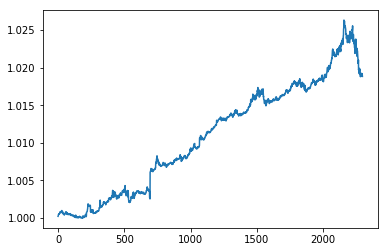

In [121]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.plot(cumList)

In [94]:
#judge whether the quantile return of ONLY sentiment score is good.
combinedData={}
portfolio={}
quantileReturn = {i:[] for i in range(nclass)}
nclass=5
realDates=[]
i=0
for date in dates:
    fileName=("C:\\Users\\lisiy\\Quant Method in Investment\\sp1500data\\combinedMAData\\combined_"+date+".csv")
    if os.path.isfile(fileName):
        realDates.append(date)
        combinedData[date]=pd.read_csv(fileName)
        returnUse = list(zip(list(combinedData[date]["SentimentScore"]),list(combinedData[date]["nextDayReturn"])))
        returnSorted = sorted(returnUse, key = lambda x:x[0])
        n = len(returnSorted)//nclass
        for j in range(nclass):
            quantileReturn[j].append(np.mean([r for s,r in returnSorted[j*n:(j+1)*n]]))
    i+=1
    sys.stdout.write( '\r Processing Data: %.2f%%-%s' % (((i * 100 / (len(dates)))), str(date)))
    sys.stdout.flush()


 Processing Data: 100.00%-2000-01-03

In [95]:
quantileCumReturn={}
quantileCumReturn=[np.cumprod([x+1 for x in v if not x==np.inf])for k,v in quantileReturn.items()]

In [99]:
returnEachQuantileSentiOnly=pd.DataFrame()
returnEachQuantileSentiOnly["Date"]=np.array(realDates)
returnEachQuantileSentiOnly["Highest Sentiment"]=np.array(quantileCumReturn[4][::-1])
returnEachQuantileSentiOnly["Second Highest Sentiment"]=np.array(quantileCumReturn[3][::-1])
returnEachQuantileSentiOnly["Third Highest Sentiment"]=np.array(quantileCumReturn[2][::-1])
returnEachQuantileSentiOnly["Fourth Highest Sentiment"]=np.array(quantileCumReturn[1][::-1])
returnEachQuantileSentiOnly["Lowest Sentiment"]=np.array(quantileCumReturn[0][::-1])
returnEachQuantileSentiOnly=returnEachQuantileSentiOnly.set_index('Date').sort_index()

In [102]:
returnEachQuantileSentiOnly.to_csv("C:\\Users\\lisiy\\Quant Method in Investment\\sp1500data\\returnEachQuantileSentiOnly.csv")

In [29]:
cumList[-1]

7.6374407698462941